<a href="https://colab.research.google.com/github/rybinski92/ml_credit_project/blob/main/prezentacja_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# data = pd.read_excel('/content/drive/MyDrive/podstawy_python_ml_klaudia_dikunow/loan_prediction2.xlsx')
url = 'https://github.com/rybinski92/ml_credit_project/blob/17d3b16ecfd2124beafd5bda56274783ab150f91/loan_prediction2.xlsx?raw=true'
data = pd.read_excel(url, engine='openpyxl')
data.head()

,Loan_ID,plec,married,osoby_na_utrzymaniu,wyksztalcenie,samo_zatrudniony,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,historia_kredytowa,wiek,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,40000.0,360.0,1.0,53,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,12800.0,360.0,1.0,32,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,6600.0,360.0,1.0,45,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,12000.0,360.0,1.0,31,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,14100.0,360.0,1.0,65,Y


In [ ]:
data = data.drop(columns='Loan_ID')
data.describe()

,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,historia_kredytowa,wiek
count,614.000000,614.000000,610.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,14522.950820,342.00000,0.842199,43.050489
std,6109.041673,2926.248369,8670.776342,65.12041,0.364878,35.028151
min,150.000000,0.000000,900.000000,12.00000,0.000000,18.000000
25%,2877.500000,0.000000,10000.000000,360.00000,1.000000,30.000000
50%,3812.500000,1188.500000,12600.000000,360.00000,1.000000,41.000000
75%,5795.000000,2297.250000,16775.000000,360.00000,1.000000,53.000000
max,81000.000000,41667.000000,70000.000000,480.00000,1.000000,700.000000


In [ ]:
data[['wyksztalcenie', 'dochod']].groupby(['wyksztalcenie']).mean()

,dochod
wyksztalcenie,
Graduate,5857.433333
Not Graduate,3777.283582


###Preprocesing

In [ ]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   plec                      601 non-null    object 
 1   married                   611 non-null    object 
 2   osoby_na_utrzymaniu       599 non-null    object 
 3   wyksztalcenie             614 non-null    object 
 4   samo_zatrudniony          582 non-null    object 
 5   dochod                    614 non-null    int64  
 6   dochod_wspolwnioskodawcy  614 non-null    float64
 7   kwota_pozyczki            610 non-null    float64
 8   okres_pozyczki            600 non-null    float64
 9   historia_kredytowa        564 non-null    float64
 10  wiek                      614 non-null    int64  
 11  Loan_Status               614 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


In [ ]:
data.nunique()

,0
plec,2
married,2
osoby_na_utrzymaniu,4
wyksztalcenie,2
samo_zatrudniony,2
dochod,505
dochod_wspolwnioskodawcy,287
kwota_pozyczki,206
okres_pozyczki,10
historia_kredytowa,2


In [ ]:
col  = list(data.columns)
cat_features = []
num_features = []
for c in col:
  if data[c].nunique() > 5:
    num_features.append(c)
  else:
    cat_features.append(c)

cat_features.remove('Loan_Status')


print(f"categorical columns: {cat_features}")
print(f"numerical columns: {num_features}")

categorical columns: ['plec', 'married', 'osoby_na_utrzymaniu', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']
numerical columns: ['dochod', 'dochod_wspolwnioskodawcy', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']


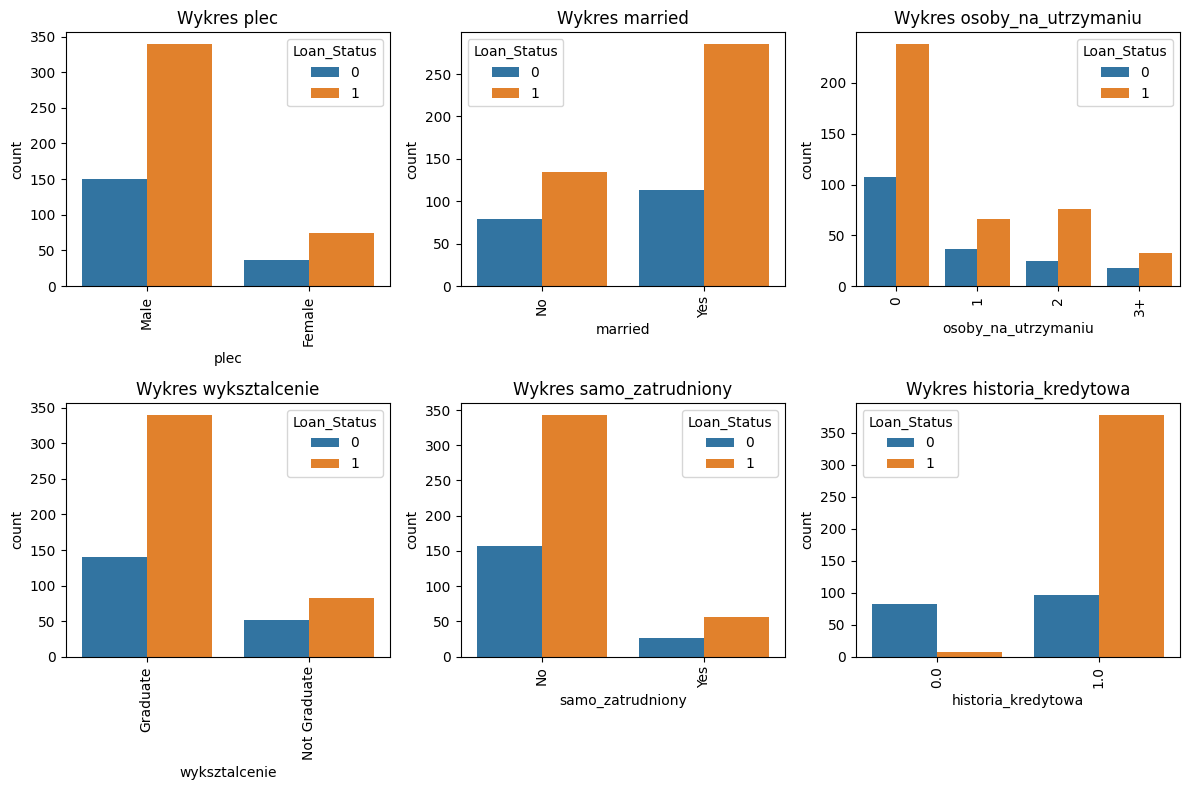

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['plec', 'married', 'osoby_na_utrzymaniu', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']

num_features = len(cat_features)
ncols = 3
nrows = (num_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='Loan_Status', data=data, ax=axes[i])
    axes[i].set_title(f'Wykres {col}')
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in cat_features:
#   plt.figure(figsize=(10, 6))
#   sns.countplot(x=col, hue='Loan_Status', data=data)
#   plt.title(f'Wykres {col}')
#   plt.xticks(rotation=90)
#   plt.show()

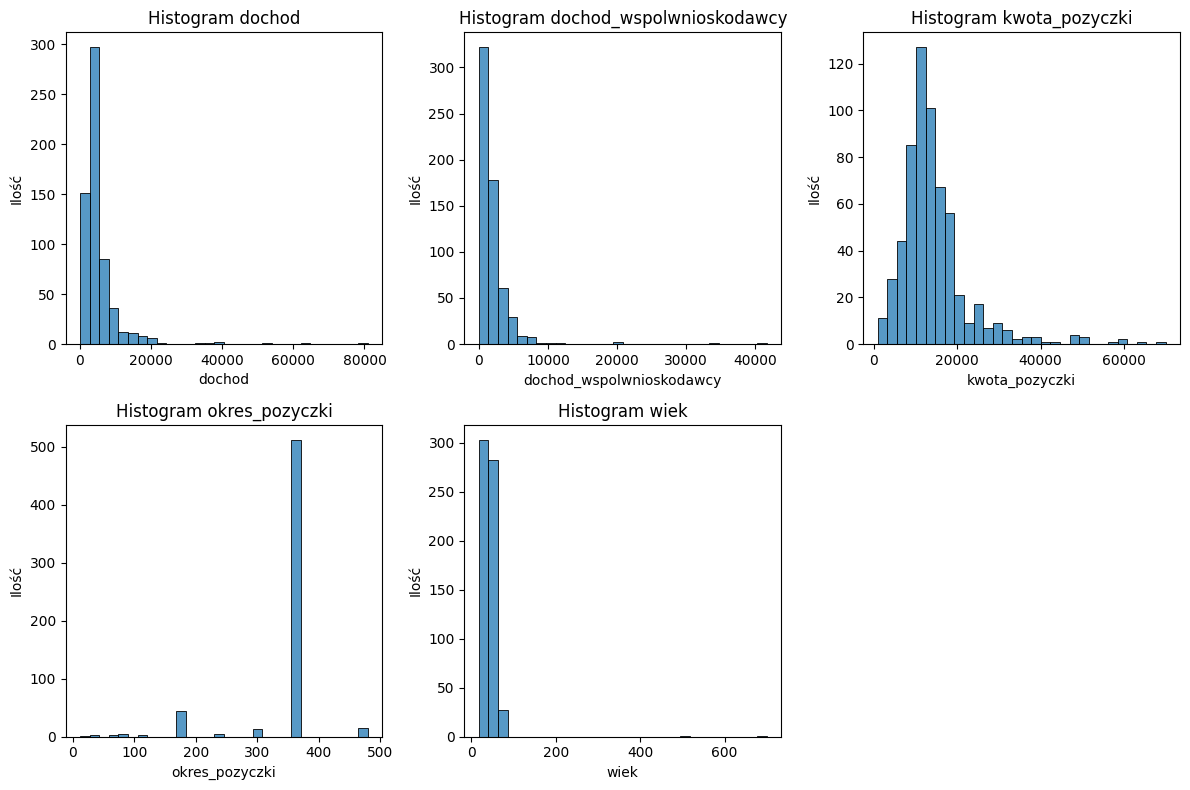

In [ ]:
num_features = ['dochod', 'dochod_wspolwnioskodawcy', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']

num_plots = len(num_features)

ncols = 3
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(data[col], bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Ilość')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
data = data[data['wiek'] < 100]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
dochod,612.0,5410.019608,6117.949379,150.0,2875.75,3813.5,5803.75,81000.0
dochod_wspolwnioskodawcy,612.0,1623.004771,2930.216391,0.0,0.00,1188.5,2303.00,41667.0
kwota_pozyczki,608.0,14545.230263,8671.079596,900.0,10000.00,12600.0,16800.00,70000.0
okres_pozyczki,598.0,342.341137,64.588407,12.0,360.00,360.0,360.00,480.0
historia_kredytowa,563.0,0.841918,0.365142,0.0,1.00,1.0,1.00,1.0
wiek,612.0,41.230392,13.400571,18.0,30.00,41.0,53.00,65.0
Loan_Status,612.0,0.686275,0.464386,0.0,0.00,1.0,1.00,1.0


In [ ]:
# for i in num_features:
#   plt.figure(figsize=(10,6))
#   sns.histplot(data[i], bins=30)
#   plt.title(f'Histogram {i}')
#   plt.xlabel(i)
#   plt.ylabel('Ilość')
#   plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

cat_features = ['plec', 'married', 'osoby_na_utrzymaniu', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']
imputer = SimpleImputer(strategy='most_frequent')
data[cat_features] = imputer.fit_transform(data[cat_features])

In [ ]:
num_features = ['dochod', 'dochod_wspolwnioskodawcy', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']
imputer = SimpleImputer(strategy='median')
data[num_features] = imputer.fit_transform(data[num_features])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   plec                      612 non-null    object 
 1   married                   612 non-null    object 
 2   osoby_na_utrzymaniu       612 non-null    object 
 3   wyksztalcenie             612 non-null    object 
 4   samo_zatrudniony          612 non-null    object 
 5   dochod                    612 non-null    float64
 6   dochod_wspolwnioskodawcy  612 non-null    float64
 7   kwota_pozyczki            612 non-null    float64
 8   okres_pozyczki            612 non-null    float64
 9   historia_kredytowa        612 non-null    object 
 10  wiek                      612 non-null    float64
 11  Loan_Status               612 non-null    int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 62.2+ KB


In [ ]:
# data['plec'].fillna('Male', inplace=True)
# data['osoby_na_utrzymaniu'].fillna(0, inplace=True)
# data['samo_zatrudniony'].fillna('No', inplace=True)
# data['okres_pozyczki'].fillna(data['okres_pozyczki'].mean(), inplace=True)
# data['historia_kredytowa'].fillna(data['historia_kredytowa'].median(), inplace=True)
# data.isna().sum()

###Get_dummies(), StandardScaler()

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# num_pipeline = Pipeline(steps=[("scaler", StandardScaler())])
# cat_pipeline = Pipeline(steps=[("one-hot", OneHotEncoder(drop='first'))])

# data[cat_features] = data[cat_features].astype(str)

# preprocessing_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_features),
#     ("cat", cat_pipeline, cat_features)
# ])


# X = data[cat_features + num_features]
# y = data['Loan_Status'].values


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

# X_train = preprocessing_pipeline.fit_transform(X_train)
# X_test = preprocessing_pipeline.transform(X_test)

# # Sprawdzenie rozmiarów po przekształceniu
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
num_features = ['dochod', 'dochod_wspolwnioskodawcy', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']
data[num_features] = scaler.fit_transform(data[num_features])
data.head()

,plec,married,osoby_na_utrzymaniu,wyksztalcenie,samo_zatrudniony,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,historia_kredytowa,wiek,Loan_Status
0,Male,No,0,Graduate,No,0.071812,-0.554339,2.948646,0.270256,1.0,0.879010,1
1,Male,Yes,1,Graduate,No,-0.135290,-0.039280,-0.200592,0.270256,1.0,-0.689369,0
2,Male,Yes,0,Graduate,Yes,-0.394248,-0.554339,-0.918433,0.270256,1.0,0.281532,1
3,Male,Yes,0,Not Graduate,No,-0.462464,0.251038,-0.293217,0.270256,1.0,-0.764054,1
4,Male,No,0,Graduate,No,0.096513,-0.554339,-0.050077,0.270256,1.0,1.775227,1


In [ ]:
# data = pd.get_dummies(data, columns=['plec', 'married', 'osoby_na_utrzymaniu', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa'], drop_first=True)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_features = ['plec', 'married', 'osoby_na_utrzymaniu', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']

data[cat_features] = data[cat_features].astype(str)
encoded_data = encoder.fit_transform(data[cat_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_features), index=data.index)
data_combined = pd.concat([data.drop(columns=cat_features), encoded_df], axis=1)

print(f"Liczba wierszy w data: {data.shape[0]}")
print(f"Liczba wierszy w data_combined: {data_combined.shape[0]}")

Liczba wierszy w data: 612
Liczba wierszy w data_combined: 612


In [ ]:
data_combined.head()

,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,wiek,Loan_Status,plec_Male,married_Yes,osoby_na_utrzymaniu_1,osoby_na_utrzymaniu_2,osoby_na_utrzymaniu_3+,wyksztalcenie_Not Graduate,samo_zatrudniony_Yes,historia_kredytowa_1.0
0,0.071812,-0.554339,2.948646,0.270256,0.879010,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.135290,-0.039280,-0.200592,0.270256,-0.689369,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.394248,-0.554339,-0.918433,0.270256,0.281532,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.462464,0.251038,-0.293217,0.270256,-0.764054,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.096513,-0.554339,-0.050077,0.270256,1.775227,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dochod                      612 non-null    float64
 1   dochod_wspolwnioskodawcy    612 non-null    float64
 2   kwota_pozyczki              612 non-null    float64
 3   okres_pozyczki              612 non-null    float64
 4   wiek                        612 non-null    float64
 5   Loan_Status                 612 non-null    int64  
 6   plec_Male                   612 non-null    float64
 7   married_Yes                 612 non-null    float64
 8   osoby_na_utrzymaniu_1       612 non-null    float64
 9   osoby_na_utrzymaniu_2       612 non-null    float64
 10  osoby_na_utrzymaniu_3+      612 non-null    float64
 11  wyksztalcenie_Not Graduate  612 non-null    float64
 12  samo_zatrudniony_Yes        612 non-null    float64
 13  historia_kredytowa_1.0      612 non-null

###Podział na zbiór testowy i treningowy, trenowanie modelu

In [ ]:
from sklearn.model_selection import train_test_split

X = data_combined.drop(columns=['Loan_Status'])
y = data_combined['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(489, 13)
(123, 13)
(489,)
(123,)


Logistic Regression Accuracy: 0.8374


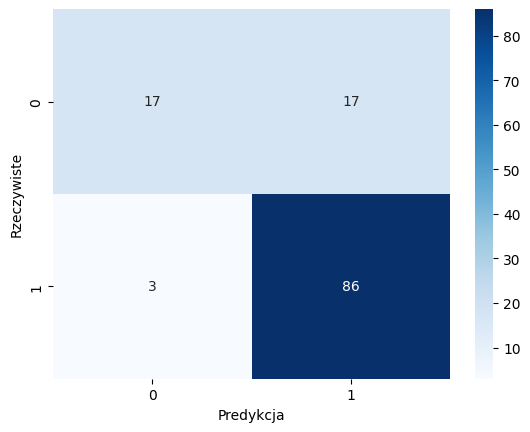

Support Vector Machine Accuracy: 0.8455


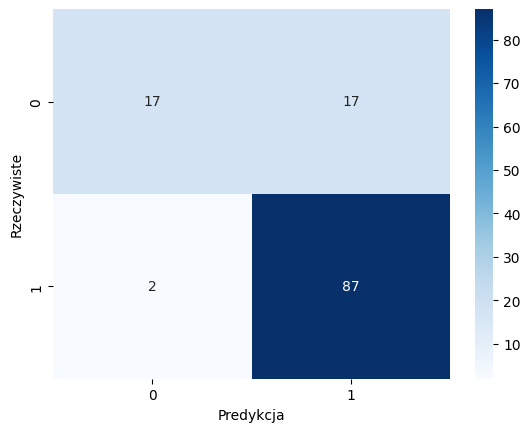

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predykcja')
    plt.ylabel('Rzeczywiste')
    plt.show()


In [ ]:
best_model = SVC()
best_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = best_model.predict(X_test)
print(y_pred)
print('')
print("Accuracy:", accuracy_score(y_test, y_pred))

[1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0]

Accuracy: 0.8455284552845529


##Przykładowy klient

In [ ]:
klient_data = {
    'plec_Male': [0],
    'married_Yes': [1],
    'osoby_na_utrzymaniu_1': [1],
    'wyksztalcenie_Not Graduate': [0],
    'samo_zatrudniony_Yes': [0],
    'dochod': [5000],
    'dochod_wspolwnioskodawcy': [500.0],
    'kwota_pozyczki': [50000.0],
    'okres_pozyczki': [200.0],
    'historia_kredytowa_1.0': [1]
}

klient_data2 = pd.DataFrame(klient_data)
klient_data2 = klient_data2.reindex(columns=X_train.columns, fill_value=0)
klient_data2[num_features] = scaler.transform(klient_data2[num_features])
klient_data2.head()

,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,wiek,plec_Male,married_Yes,osoby_na_utrzymaniu_1,osoby_na_utrzymaniu_2,osoby_na_utrzymaniu_3+,wyksztalcenie_Not Graduate,samo_zatrudniony_Yes,historia_kredytowa_1.0
0,-0.067074,-0.383563,4.106455,-2.235752,-3.079281,0,1,1,0,0,0,0,1


In [ ]:
wynik = best_model.predict(klient_data2)
print("Przewidywany status pozyczki:", 'TAK - udzielimy kredytu' if wynik[0] == 1 else 'NIE - nie udzielamy kredytu')

Przewidywany status pozyczki: TAK - udzielimy kredytu
